# Project: Investigate a Dataset: No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>**No Show Appointments:** This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
*  ‘ScheduledDay’ tells us on what day the patient set up their appointment.
* ‘Neighborhood’ indicates the location of the hospital.
* ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
* ‘No_show’ it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up

>**I will analyze some questions to find the factors are important for us to know in order to predict if a patient will show up for their scheduled appointment:**
1. What is the percentage of those who attended the appointment vs to those who did not attend?
2. What are the most important characteristics (age, gender, and SMS received) and effect them to the patient that showed up to their appointment or he did not show up? 

>Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean my dataset for analysis.

### General Properties

>Loading the data and printing out a few lines in data frame

In [2]:
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


>Viewing dimensions of dataset

In [3]:
df.shape

(110527, 14)

We have 110527 rows and 14 columns in this dataset

>Summary statistics of data

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>Checking the info of the data types and null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


We don't have any null value in this dataset

>Checking if there are duplicate rows in the data

In [6]:
df.duplicated().sum()

0

We don't have any duplicate row

### Data Cleaning
> Includes removing any data harmful for the analysis, drop features that aren't relevant to our questions and rename column labels

>Dropping columns that aren't relevant to our questions

In [7]:
df.drop(['PatientId', 'Neighbourhood', 'AppointmentID','Scholarship','Hipertension', 'Diabetes', 'Alcoholism','Handcap', 'ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)

>Showing the columns and some of rows in the dataframe to confirm changes

In [8]:
df.head()

,Gender,Age,SMS_received,No-show
0,F,62,0,No
1,M,56,0,No
2,F,62,0,No
3,F,8,0,No
4,F,56,0,No


>Rename all column labels to be much easier to work with them

In [9]:
df.rename(columns = {'Gender' : 'gender', 'Age' : 'age', 'SMS_received' : 'sms_received', 'No-show' : 'no_show'}, inplace=True)

>Confirm changes

In [10]:
df.head()

,gender,age,sms_received,no_show
0,F,62,0,No
1,M,56,0,No
2,F,62,0,No
3,F,8,0,No
4,F,56,0,No


>Converting no_show values to boolean (1 and 0) instead of ('Yes' and 'No')

In [11]:
df.no_show.replace({'No' : 0, 'Yes' : 1}, inplace=True)

>Converting 'no_show' column to int

In [12]:
df['no_show'] = df['no_show'].astype(int)

In [13]:
df.head()

,gender,age,sms_received,no_show
0,F,62,0,0
1,M,56,0,0
2,F,62,0,0
3,F,8,0,0
4,F,56,0,0


>Check if there is any error value in age (value = zero or negative)

In [14]:
df[df['age'] <= 0]

,gender,age,sms_received,no_show
59,F,0,0,0
63,M,0,0,0
64,M,0,1,0
65,M,0,0,0
67,F,0,0,0
89,M,0,0,0
101,M,0,0,0
104,F,0,0,1
132,M,0,1,1
150,M,0,0,0


>Creating new dataframe from the old dataframe without the rows that have error values in age and confirming the changes

In [15]:
data_f = df[(df['age'] > 0)] 
data_f.head()

,gender,age,sms_received,no_show
0,F,62,0,0
1,M,56,0,0
2,F,62,0,0
3,F,8,0,0
4,F,56,0,0


>Checking the info of the data types and null values in the new dataframe 'data_f'

In [16]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 4 columns):
gender          106987 non-null object
age             106987 non-null int64
sms_received    106987 non-null int64
no_show         106987 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.1+ MB


>Viewing the dimensions of dataset

In [17]:
data_f.shape

(106987, 4)

We have 106987 rows and 4 columns in this dataset

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: What is the percentage of those who attended the appointment vs to those who did not attend?

>Creating a pie chart to compare the percentage of those who attended the appointment vs to those who did not attend

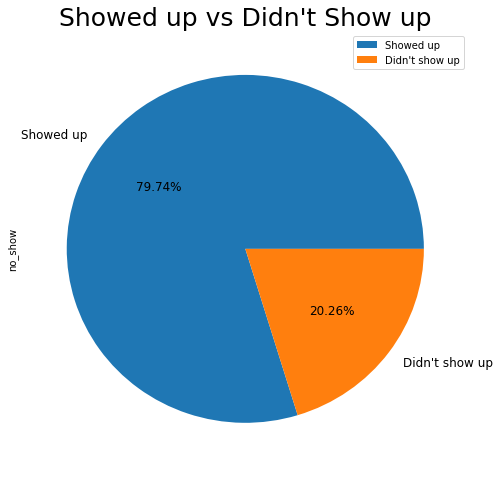

In [18]:
show_counts = data_f.no_show.value_counts()
labels = ["Showed up", "Didn't show up"]
plt.title("Showed up vs Didn't Show up", size=25)
show_counts.plot.pie(figsize=(8, 8), labels=labels, autopct='%.2f%%', fontsize = 12)
plt.legend();

### Research Question 2: What are the most important characteristics (age, gender, and SMS received) and effect them to the patient that showed up to their appointment or he did not show up?

>Create masks for rows where patients showed up and rows where they didn't show up to make them easier to grab

In [19]:
showed = data_f.no_show == True
not_showed = data_f.no_show == False

>Calculating the mean of patient's ages that showed up

In [20]:
data_f.age[showed].mean()

35.329151291512915

>Calculating the mean of patient's ages that didn't show up

In [21]:
data_f.age[not_showed].mean()

39.075187264820002

We notice that patients who came to their appointments they are younger than they didn't come

>Creating histogram to study the relationship better and compare them in a visual

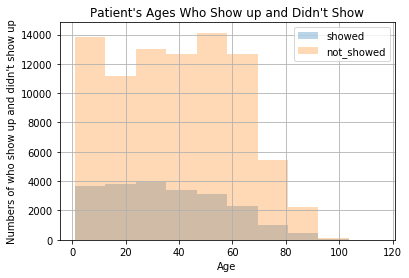

In [22]:
plt.title("Patient's Ages Who Show up and Didn't Show")
plt.xlabel('Age')
plt.ylabel("Numbers of who show up and didn't show up")
data_f.age[showed].hist(alpha=0.3, label='showed'), data_f.age[not_showed].hist(alpha=0.3, label='not_showed')
plt.legend();

>Creating histogram to study the relationship between sms receivers and who came to their appointments and they didn't come

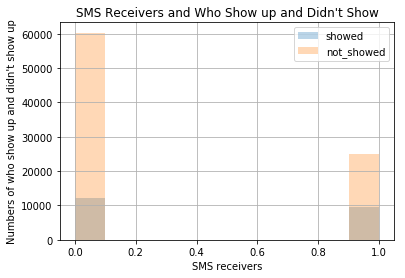

In [23]:
plt.title("SMS Receivers and Who Show up and Didn't Show")
plt.xlabel('SMS receivers')
plt.ylabel("Numbers of who show up and didn't show up")
data_f.sms_received[showed].hist(alpha=0.3, label='showed'), data_f.sms_received[not_showed].hist(alpha=0.3, label='not_showed')
plt.legend();

* SMS receivers = 0  It means the patients who received SMS
* SMS receivers = 1  It means the patients who didn't receive SMS

>Creating a pie chart to compare the percentage of those who received SMS vs to those who did not receive

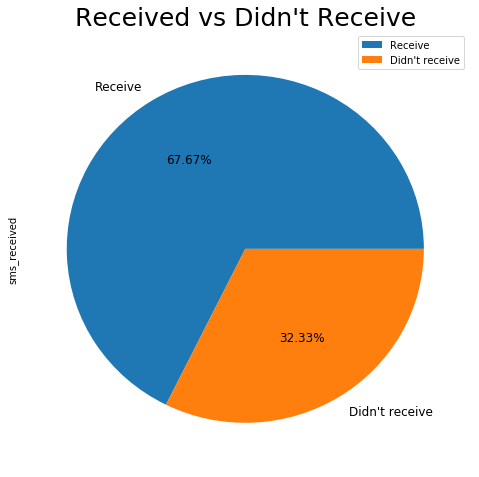

In [24]:
received_counts = data_f.sms_received.value_counts()
labels = ["Receive", "Didn't receive"]
plt.title("Received vs Didn't Receive", size=25)
received_counts.plot.pie(figsize=(8, 8), labels=labels, autopct='%.2f%%', fontsize = 12)
plt.legend();

We notice there are 67.67% of patients received SMS to their appointments and 32.33% of them didn't receive SMS

>Calculating the mean of patient's gender that showed up and didn't by using groupby() function

In [25]:
data_f.groupby('gender').no_show.mean()

gender
F    0.203585
M    0.200846
Name: no_show, dtype: float64

We notice there isn't different in average between males and females

>Creating a bar chart to study the relationship better and compare them in a visual

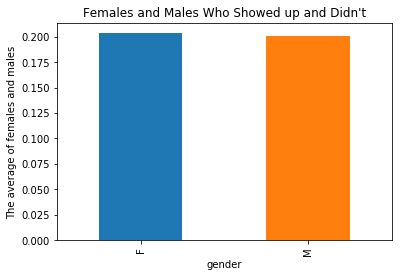

In [26]:
plt.title("Females and Males Who Showed up and Didn't")
plt.ylabel('The average of females and males')
data_f.groupby('gender').no_show.mean().plot(kind='bar');

<a id='conclusions'></a>
## Conclusions

> * We notice there are 79.74% of patients came to their appointments and 20.26% of them didn't come.
* We notice that patients who came to their appointments they are younger than the ones who didn't come.
* The SMS didn't appear to be increasing hand to hand with the numbers of patients who showed up.
* As we can see that the average of females are as high as the average of males showing up in their appointment and that mean the gender isn't correlated feature with show up the patient for the appointment.
* Finally, Age seems to be The main effective feature that is important  in this study.


## Limitations
>* The range of this analysis is limited for 100k medical appointments in Brazil, therefore the conclusions and findings don't provide representative sample, so as a matter of fact, we can't predict at any of this different regions, the possibility of the patient show up or won't to for the appointment.
* In addition to that, the value of age in this eky of study data,  were lacking  informations and numbers, such as  negative number or 0 not to mention some of missing features concerning the employee or unemployee  in this data, that could be useful for its analysis and helpful to our predictions and conclusions.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [27]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])


ValueError: Need to specify at least one of 'labels', 'index' or 'columns'